In [42]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
# Carrega a base
dataset = pd.read_csv("/content/Pos MLs04d bike share.csv")
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
X = dataset.drop(labels=['casual', 'registered', 'cnt', 'dteday'], axis=1)
y = dataset['cnt']

numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [26]:
# Normalizar os dados
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [28]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', DecisionTreeRegressor())])

In [29]:
# Definição do modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(1)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [30]:
# Compilação do modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mae'])


In [31]:
# Treinando o modelo
epochs_hist = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
15/15 [==============================] - 1s 17ms/step - loss: 4617.9951 - mae: 4617.9951 - val_loss: 4334.3516 - val_mae: 4334.3516
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 4617.5439 - mae: 4617.5439 - val_loss: 4333.9146 - val_mae: 4333.9146
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 4617.0991 - mae: 4617.0991 - val_loss: 4333.4785 - val_mae: 4333.4785
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 4616.6479 - mae: 4616.6479 - val_loss: 4333.0308 - val_mae: 4333.0308
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 4616.1733 - mae: 4616.1733 - val_loss: 4332.5503 - val_mae: 4332.5503
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 4615.6587 - mae: 4615.6587 - val_loss: 4332.0352 - val_mae: 4332.0352
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 4615.0947 - mae: 4615.0947 - val_loss: 4331.4663 - val_mae: 4331.466

In [32]:
# Avaliação do modelo
loss = model.evaluate(X_test, y_test)
print(f"Perda: {loss}")

5/5 [==============================] - 0s 3ms/step - loss: 972.5063 - mae: 972.5063
Perda: [972.50634765625, 972.50634765625]


In [ ]:
model.get_weights()

In [39]:
# Previsões
predictions = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [40]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 972.5064149194834


In [35]:
# Calcula R2 score
# Proporção de variância
r2 = r2_score(y_test, predictions)
print(f"R2 Score: {r2}")

R2 Score: 0.5930515641884602


ValueError: ignored

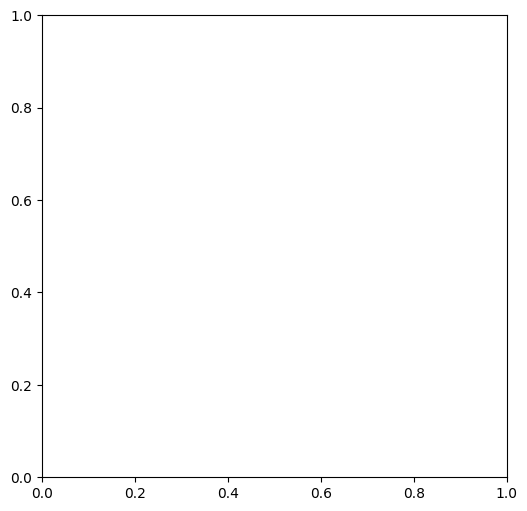

In [43]:
# Plota Actual VS Predicted
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, predictions, label='Predicted')
plt.xlabel('casual')
plt.ylabel('cnt')
plt.legend()
plt.show()